# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [8]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

### **1.1 Load the Data**

In [11]:
# Load the dataset
emp = pd.read_csv("Employee_data.csv")

In [12]:
# Check the first few entries
emp.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [13]:
# Inspect the shape of the dataset
emp.shape

(74610, 24)

In [14]:
# Inspect the different columns in the dataset
emp.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [16]:
# Check the summary of the dataset
emp.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [18]:
# Check the info to see the types of the feature variables and the null values present
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [22]:
# Check the number of missing values in each column
emp.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [24]:
# Check the percentage of missing values in each column
print('Percentage of missing values for Distance from Home is:', round((emp['Distance from Home'].isnull().sum()/emp.shape[0]*100),2))
print('Percentage of missing values for Company Tenure (In Months) is:', round((emp['Company Tenure (In Months)'].isnull().sum()/emp.shape[0]*100),2))

Percentage of missing values for Distance from Home is: 2.56
Percentage of missing values for Company Tenure (In Months) is: 3.23


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [26]:
# Handle the missing value rows in the column
emp.dropna(inplace=True, subset=['Distance from Home', 'Company Tenure (In Months)'])

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [28]:
# Check the percentage of remaining data after missing values are removed
print('Percentage of missing values for Distance from Home is:', round((emp['Distance from Home'].isnull().sum()/emp.shape[0]*100),2))
print('Percentage of missing values for Company Tenure (In Months) is:', round((emp['Company Tenure (In Months)'].isnull().sum()/emp.shape[0]*100),2))

Percentage of missing values for Distance from Home is: 0.0
Percentage of missing values for Company Tenure (In Months) is: 0.0


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [31]:
# Write a function to display the categorical columns with their unique values and check for redundant values
cat_cols = emp.select_dtypes(include='object').columns
cat_cols

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [32]:
for col in cat_cols:
    print(emp[col].value_counts(dropna=False))
    print()

Gender
Male      38700
Female    31935
Name: count, dtype: int64

Job Role
Technology    18340
Healthcare    16207
Education     14813
Media         11346
Finance        9929
Name: count, dtype: int64

Work-Life Balance
Good         26683
Fair         21402
Excellent    12740
Poor          9810
Name: count, dtype: int64

Job Satisfaction
High         35332
Very High    14283
Medium       13954
Low           7066
Name: count, dtype: int64

Performance Rating
Average          42401
High             14151
Below Average    10546
Low               3537
Name: count, dtype: int64

Overtime
No     47588
Yes    23047
Name: count, dtype: int64

Education Level
Bachelorâ€™s Degree    21169
Associate Degree       17677
Masterâ€™s Degree      14303
High School            13877
PhD                     3609
Name: count, dtype: int64

Marital Status
Married     35516
Single      24869
Divorced    10250
Name: count, dtype: int64

Job Level
Entry     28199
Mid       28145
Senior    14291
Name: count, dt

In [33]:
# Check the data
emp['Education Level'] = emp['Education Level'].str.replace("â€™", "'", regex=False)
emp['Education Level'].value_counts()

Education Level
Bachelor's Degree    21169
Associate Degree     17677
Master's Degree      14303
High School          13877
PhD                   3609
Name: count, dtype: int64

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [35]:
# Finding number of entries where Years at Company < industry tenure ( this should ideally be the case for all entries)
emp[emp['Years at Company'] < (emp['Company Tenure (In Months)'] / 12)].shape[0]

8837

In [36]:
# For some entries, Years at Company > Tenure, which is impossible, as total industry experience can't be less than duration worked at current company
emp[emp['Years at Company'] > (emp['Company Tenure (In Months)'] / 12)].shape[0]

61541

In [37]:
# Percentage of cases where Years at Company < Industry Tenure
round((emp[emp['Years at Company'] < (emp['Company Tenure (In Months)'] / 12)].shape[0])/emp.shape[0]*100 , 2)

12.51

In [38]:
# Storing Employee IDs in another variable
emp_ids = emp['Employee ID'].copy()

In [39]:
# Drop redundant columns which are not required for modelling
# Dropping Employee ID & Company Tenure (In Months)
emp.drop(columns=['Employee ID', 'Company Tenure (In Months)'], inplace=True)

In [40]:
# Check first few rows of data
emp.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Marital Status Number of Dependents Job Level  Company Size  \
0       No  ...         Married                    0       Mid        Medium   
1       No  ...        Divorced                    3       Mid        Medium   
2       No  ...         Married                    3       Mid        Medium   
3       No  ...          Single                    2       Mid         Small   
4      Yes  ...        Divorced                    0    Senior        Medium   

  Remote Work Leadership Opportunities Innovation Opportunities  \
0          No                       No                       No   
1          No                       No                       No   
2          No                       No                       No   
3         Yes                       No                       No   
4          No                       No                       No   

  Company Reputation Employee Recognition Attrition  
0          Excellent               Medium    Stayed  
1               Fair                  Low    Stayed  
2               Poor                  Low    Stayed  
3               Good               Medium    Stayed  
4               Fair               Medium    Stayed  

[5 rows x 22 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [43]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [45]:
# Put all the feature variables in X
X = emp.drop(columns=['Attrition'])
# Put the target variable in y
y = emp['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [47]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(y_train.shape)

(49444,)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [52]:
# Select numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64'])
num_cols

Age  Years at Company  Monthly Income  Number of Promotions  \
1516    39                25            5980                     1   
3352    19                 3            8663                     2   
59196   49                29            6195                     0   
71453   30                 9            5753                     1   
68890   26                15            5811                     2   
...    ...               ...             ...                   ...   
15937   29                 2            8460                     0   
66958   41                28           12088                     1   
69203   21                12            6590                     0   
59485   30                 9            6152                     0   
40956   19                 1            4476                     0   

       Distance from Home  Number of Dependents  
1516                 31.0                     1  
3352                 58.0                     4  
59196                66.0                     1  
71453                59.0                     3  
68890                76.0                     2  
...                   ...                   ...  
15937                41.0                     0  
66958                42.0                     2  
69203                38.0                     3  
59485                 8.0                     3  
40956                85.0                     1  

[49444 rows x 6 columns]

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

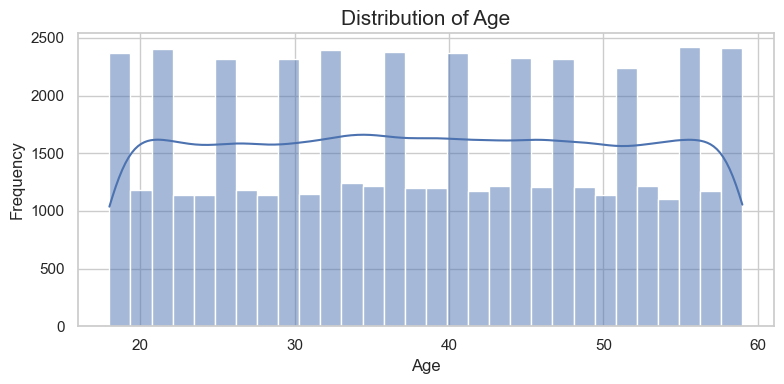

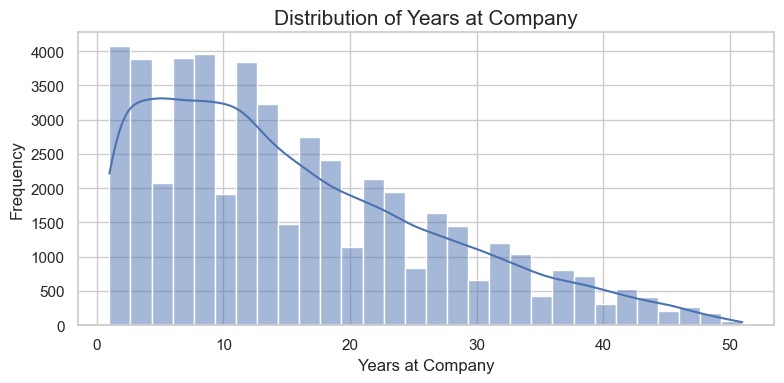

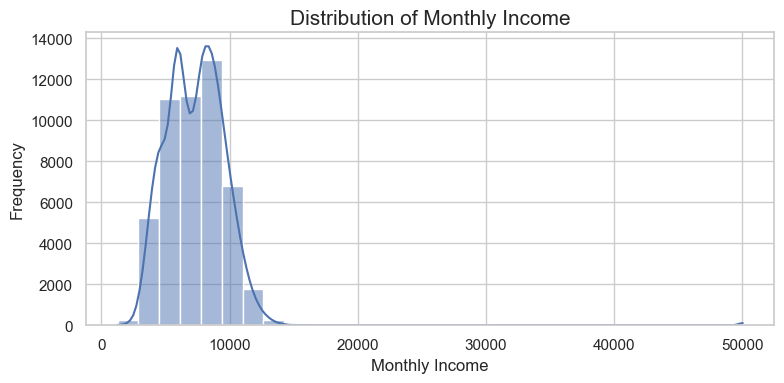

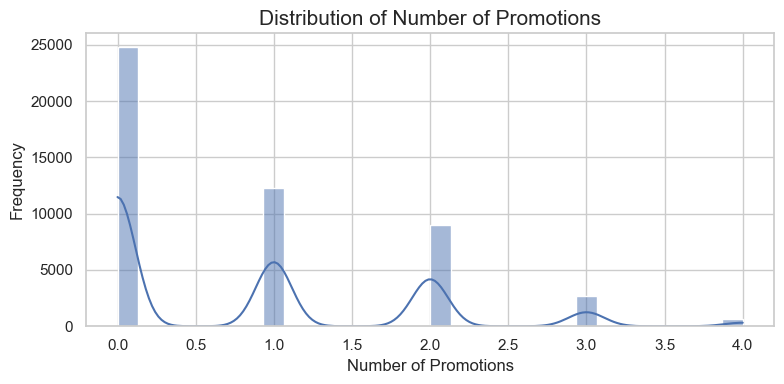

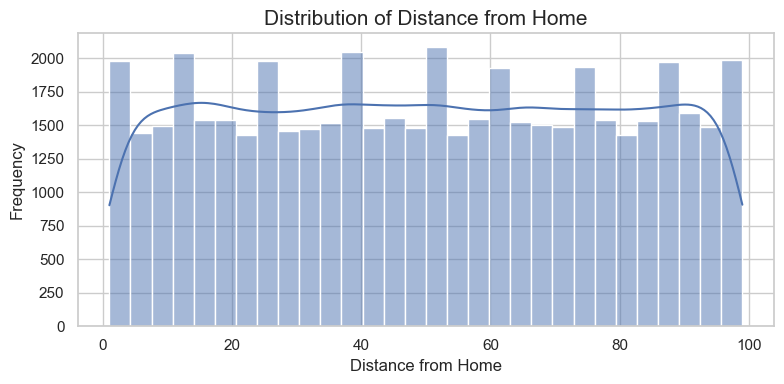

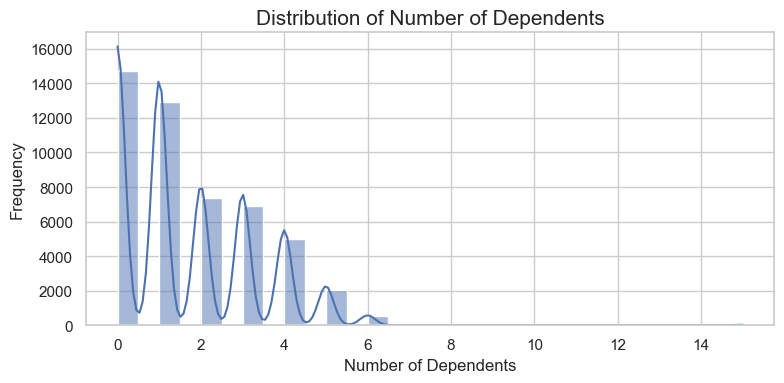

In [54]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

#plot distribution for each numerical column
for col in num_cols.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(num_cols[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

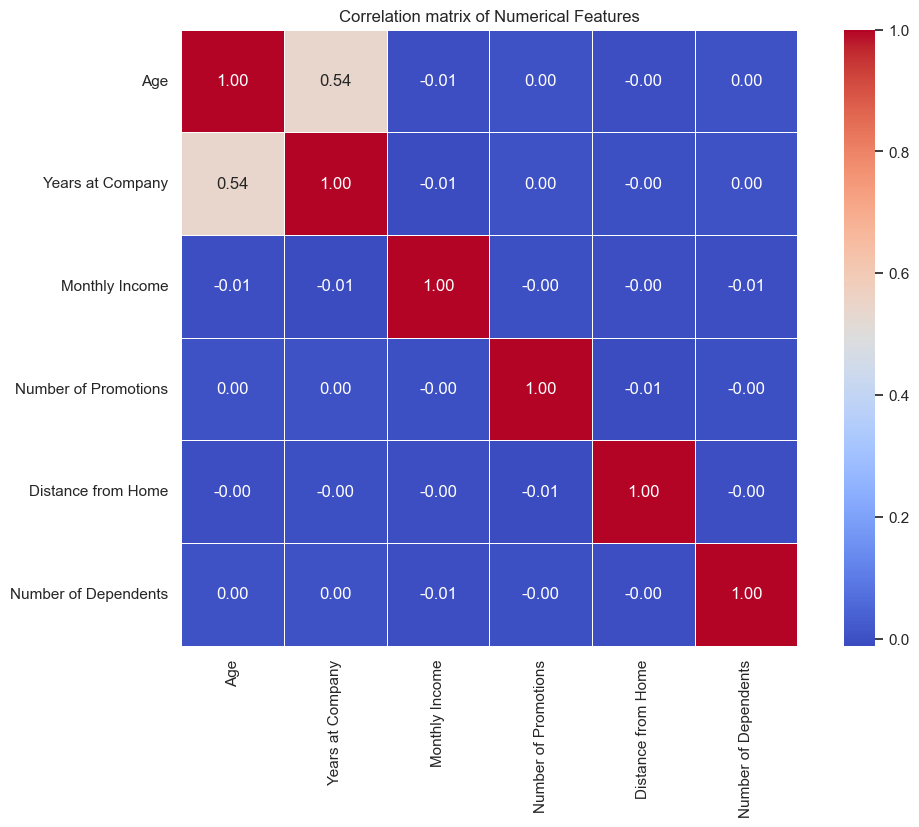

In [57]:
# Create correlation matrix for numerical columns
corr_matrix = num_cols.corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f", cmap= 'coolwarm', square= True, linewidths= 0.5)
plt.title("Correlation matrix of Numerical Features")
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

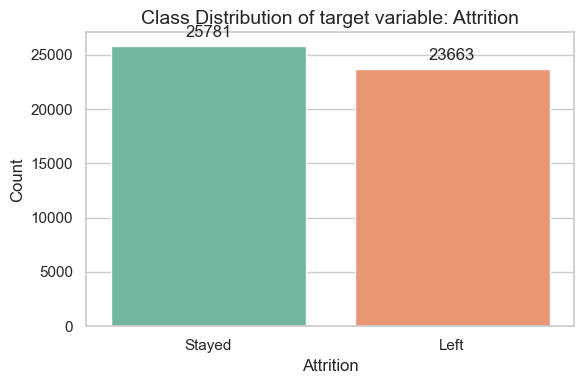

In [60]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, palette='Set2')

plt.title("Class Distribution of target variable: Attrition", fontsize=14)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Count', fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 10),
                       textcoords='offset points')
plt.tight_layout()
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

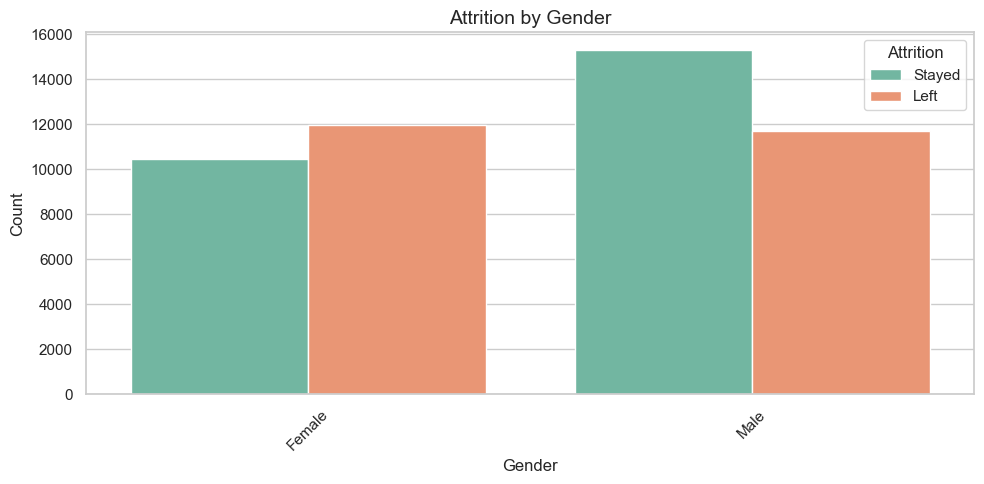

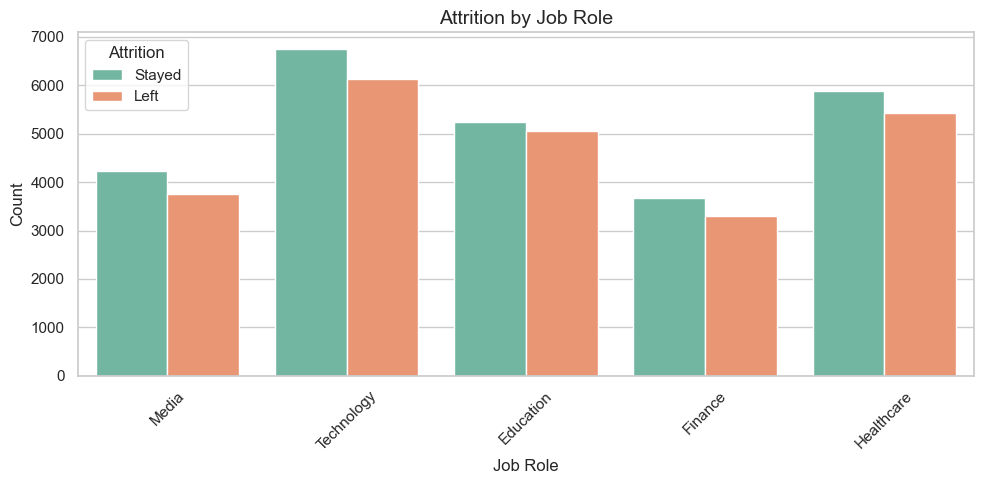

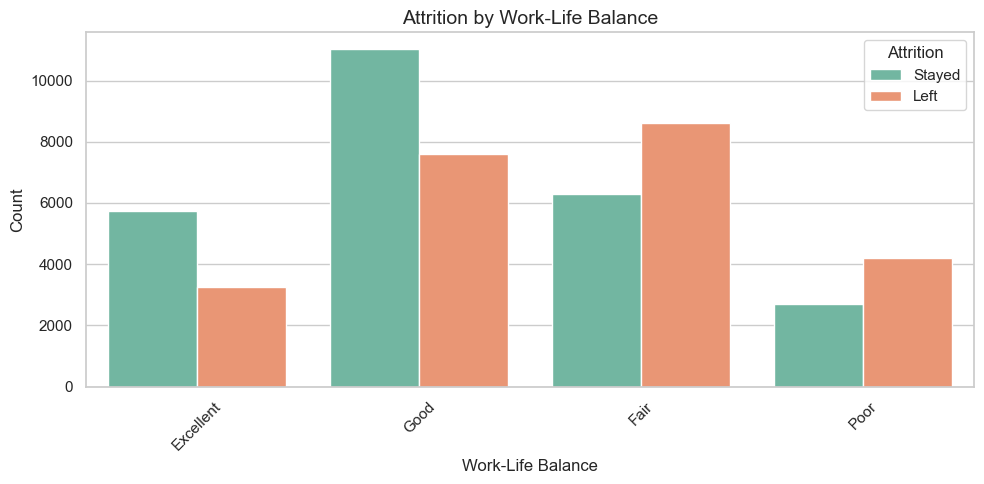

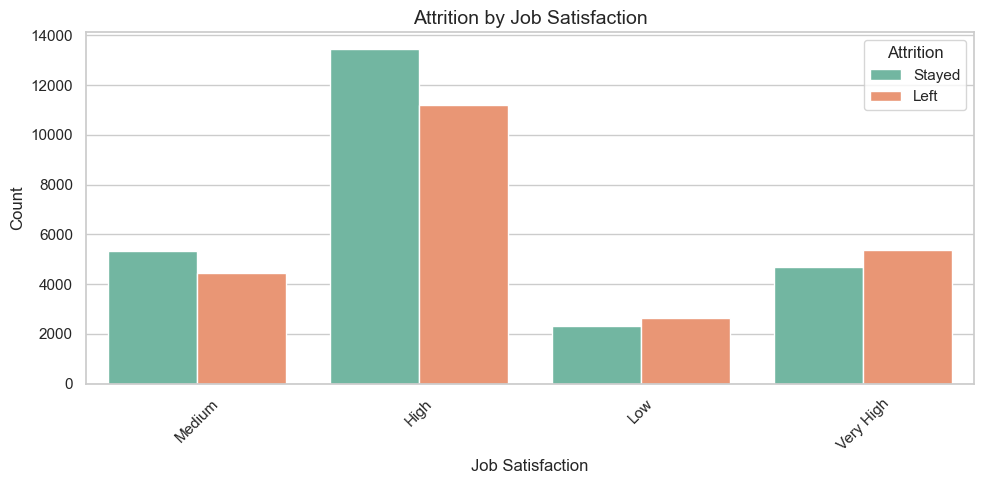

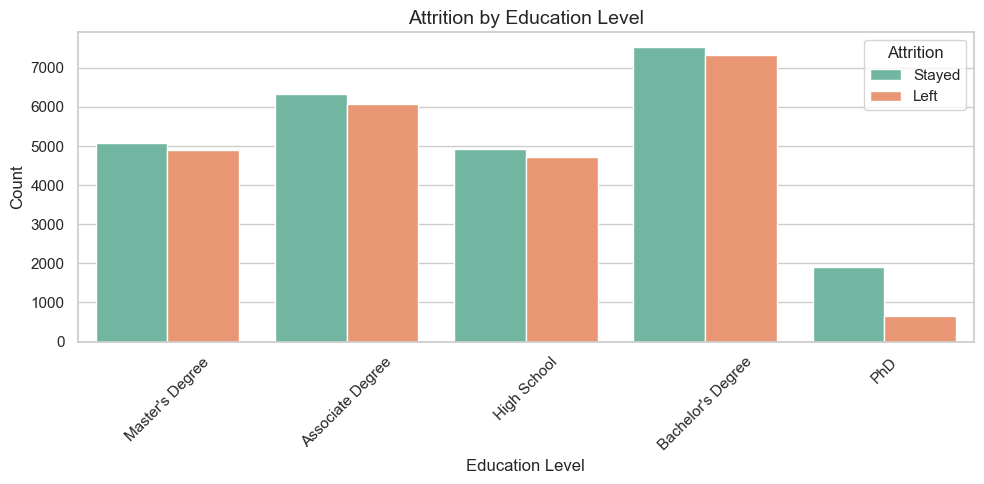

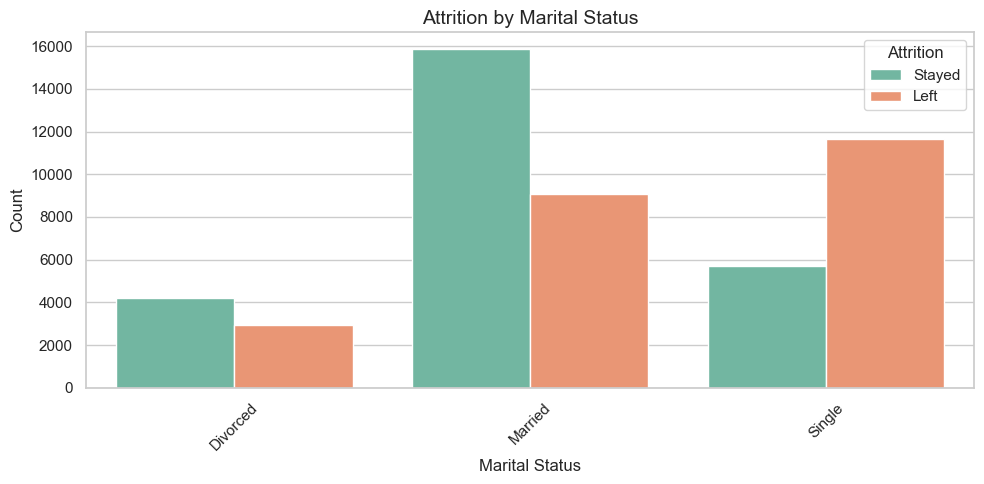

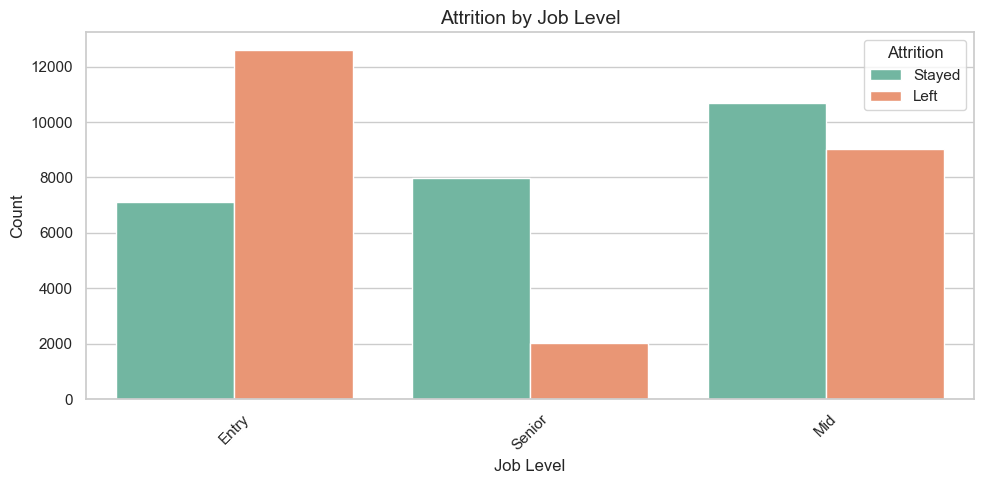

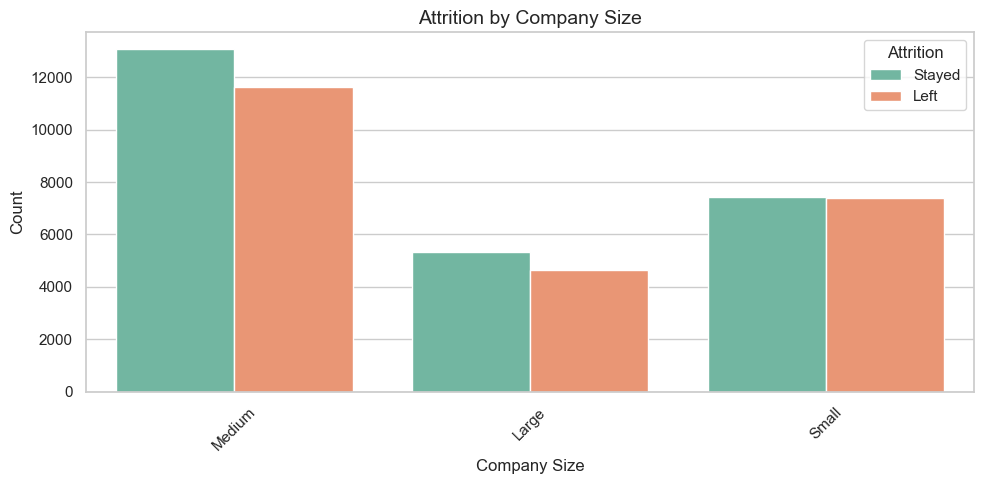

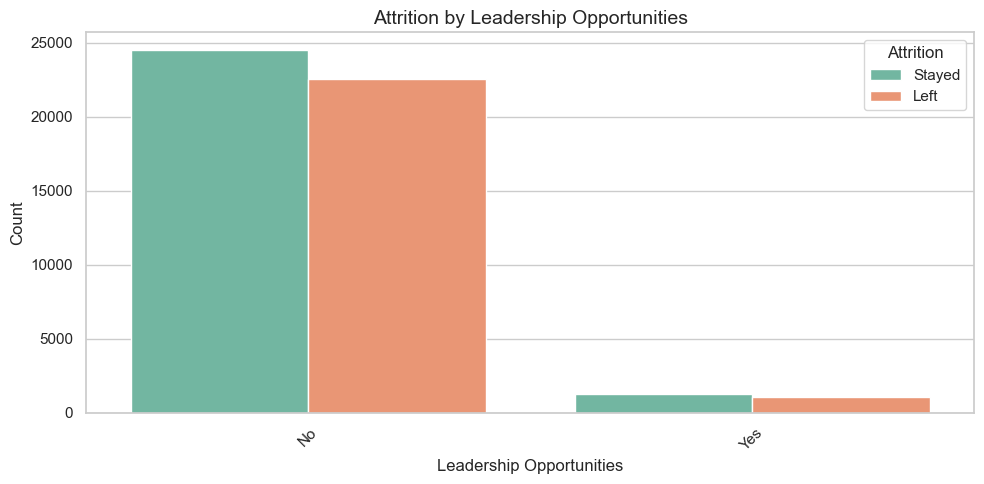

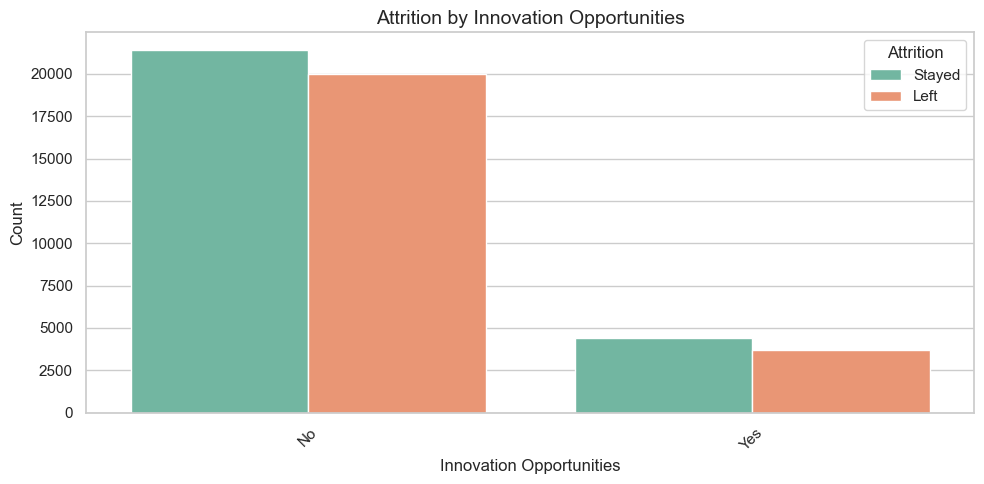

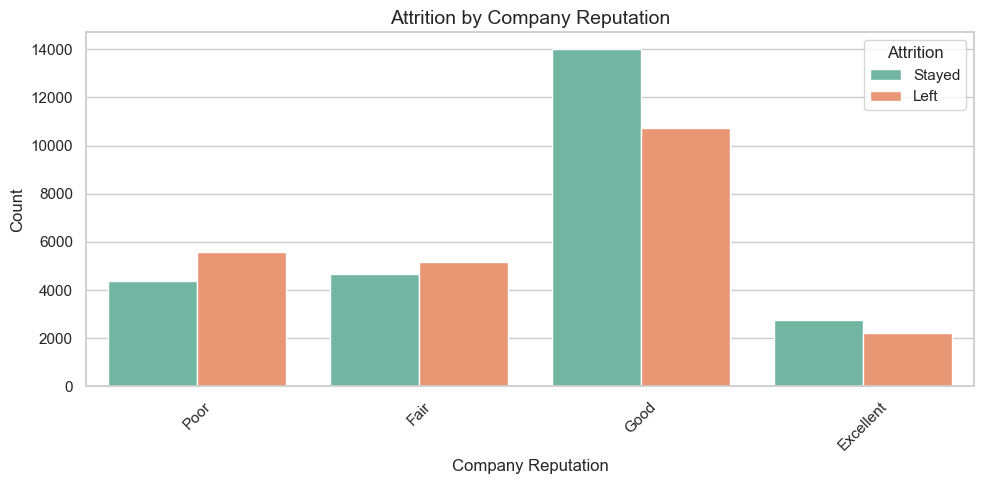

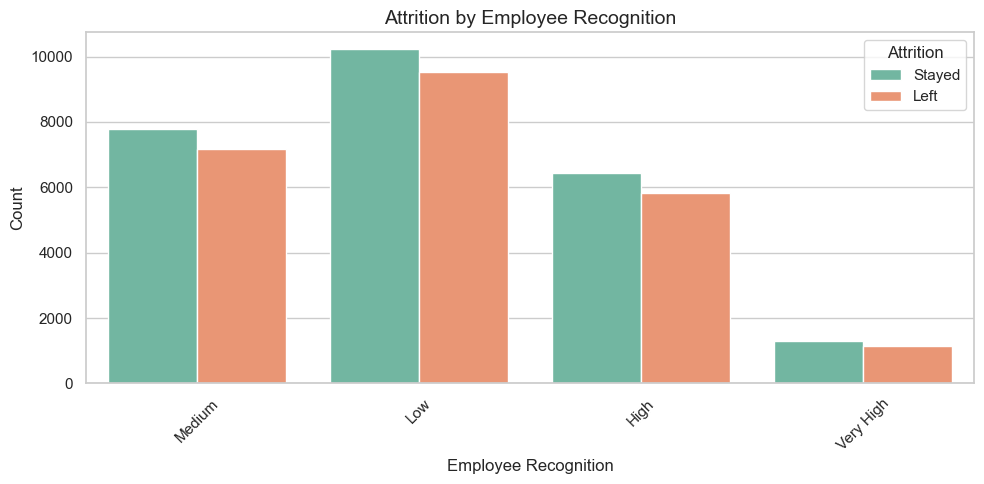

In [63]:
# Plot distribution for each categorical column with target variable
#Get Categorical columns
train_data = X_train.copy()
train_data['Attrition'] = y_train

cat_cols_X_train = X_train.select_dtypes(include=['object', 'category']).columns

#set plot Style
sns.set(style='whitegrid')

#plot Distribution for each categorical column with respect to Attrition

for col in cat_cols_X_train:
    plt.figure(figsize=(10,5))
    sns.countplot(data = train_data, x= col, hue = 'Attrition', palette='Set2')
    plt.title(f'Attrition by {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [68]:
# Select numerical columns

val_num_cols = X_test.select_dtypes(include=['int64', 'float64'])
val_num_cols.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
38726   22                 5            8751                     2   
24574   43                19            8585                     2   
21775   39                 2            5462                     1   
42700   30                11            7936                     2   
60433   49                37            5413                     1   

       Distance from Home  Number of Dependents  
38726                32.0                     1  
24574                38.0                     4  
21775                40.0                     1  
42700                21.0                     0  
60433                13.0                     0

5.1.2 Plot distribution of numerical columns

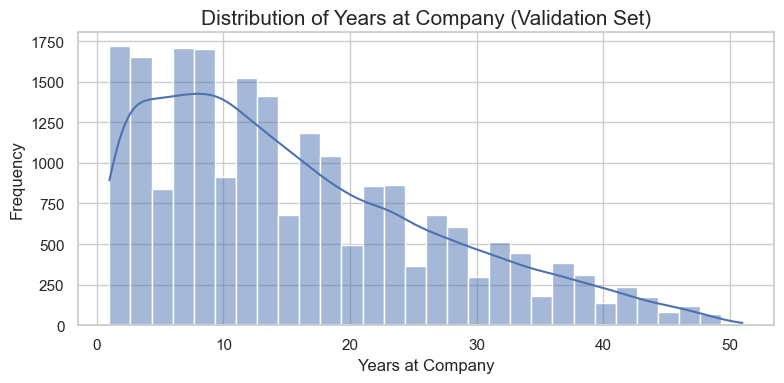

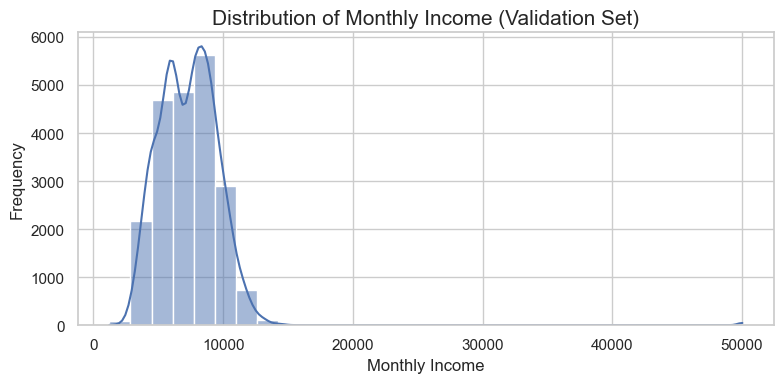

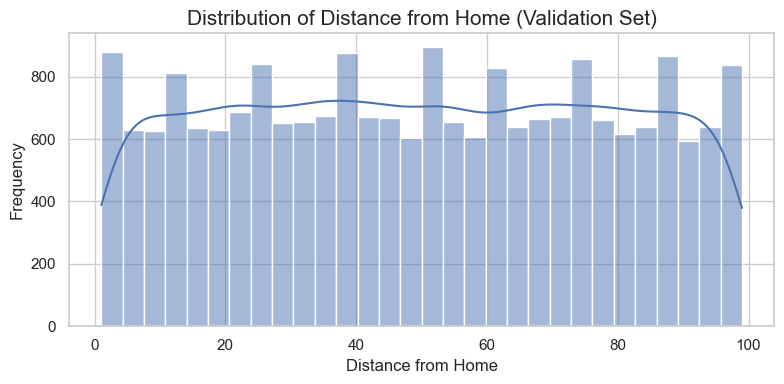

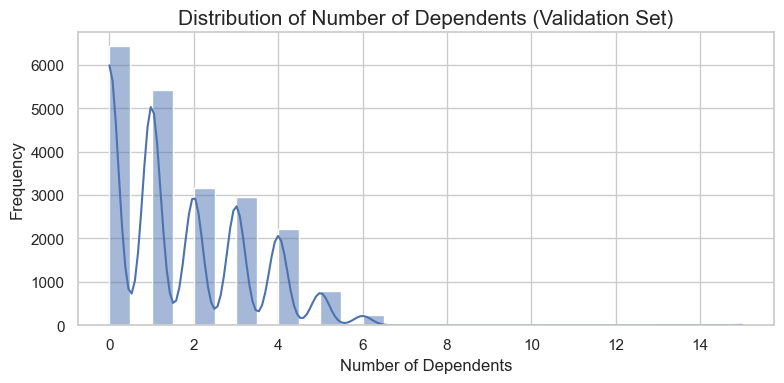

In [70]:
# Plot all the numerical columns to understand their distribution
sns.set(style='whitegrid')

#plot distribution for each numerical column
for col in val_num_cols.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(val_num_cols[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} (Validation Set)', fontsize=15)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [73]:
# Create correlation matrix for numerical columns
val_corr_matrix = val_num_cols.corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(val_corr_matrix,annot=True,fmt=".2f", cmap= 'coolwarm', square= True, linewidths= 0.5)
plt.title("Correlation matrix of Numerical Features of Validation Set")
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [76]:
# Plot a bar chart to check class balance
plt.figure(figsize=(6,4))
sns.countplot(x=y_test, palette='Set2')

plt.title("Class Distribution of target variable: Attrition in Validation Set", fontsize=14)
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

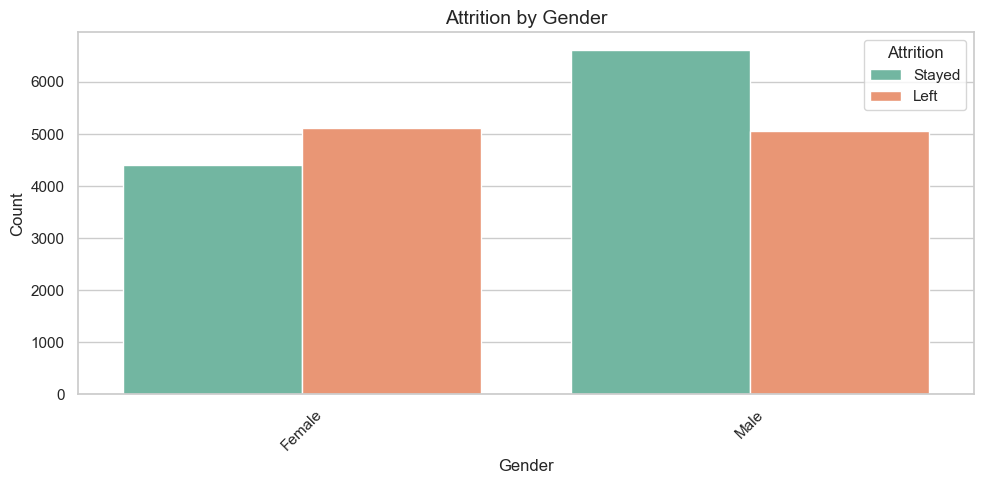

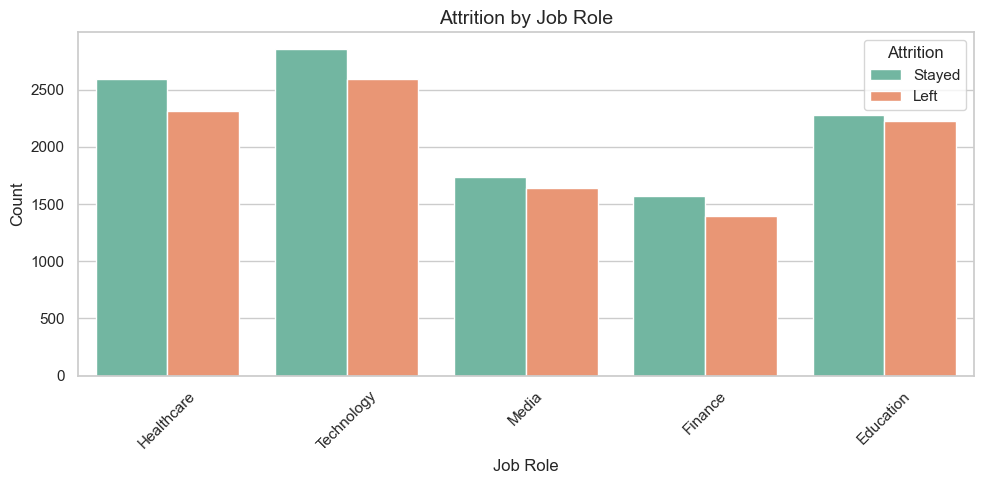

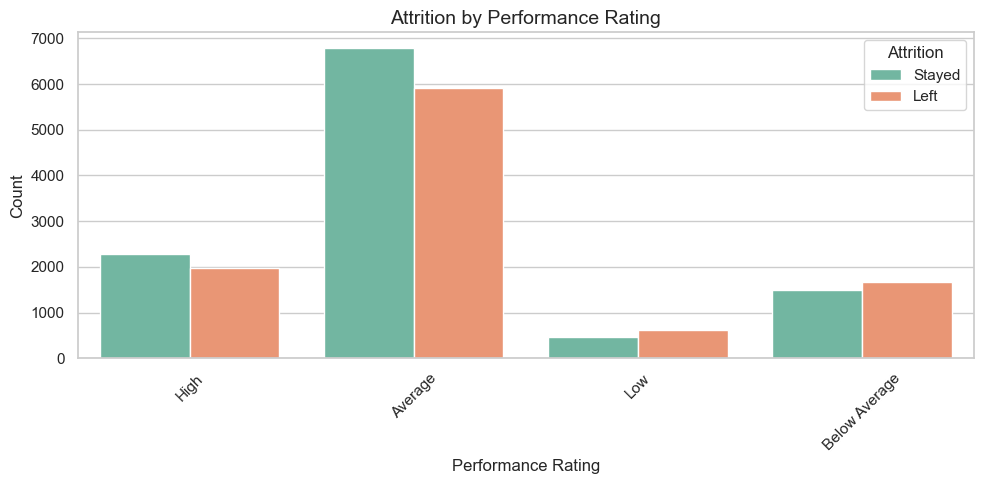

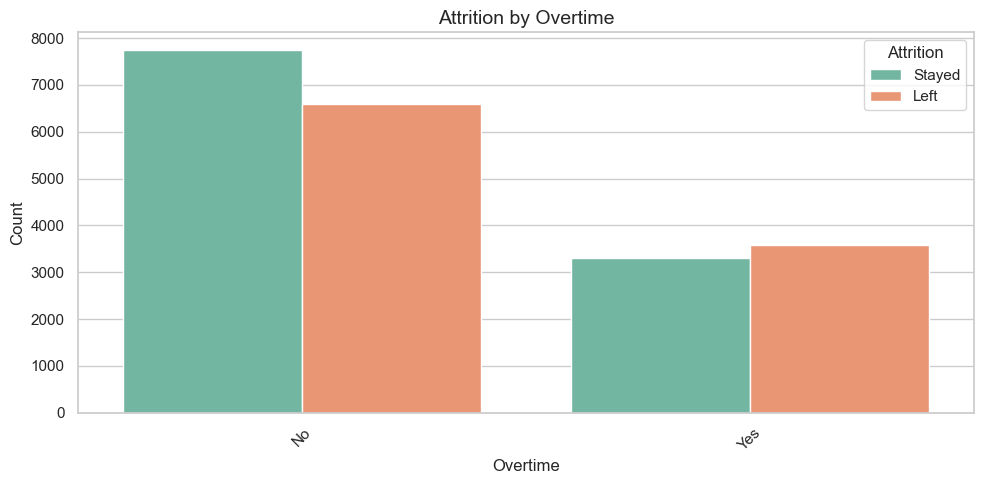

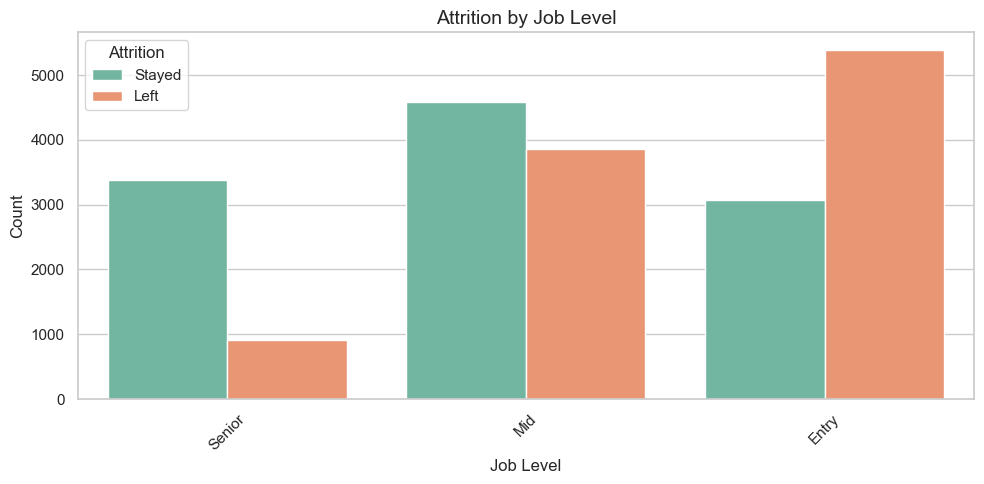

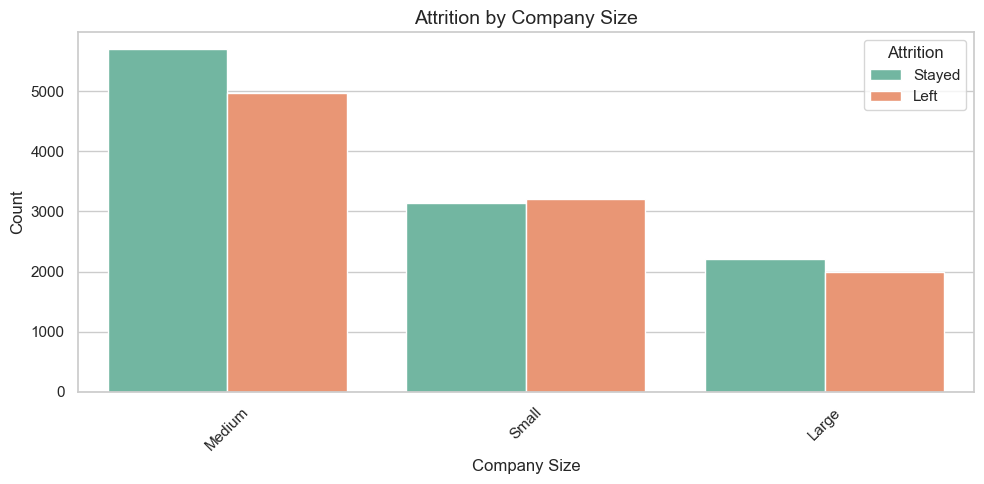

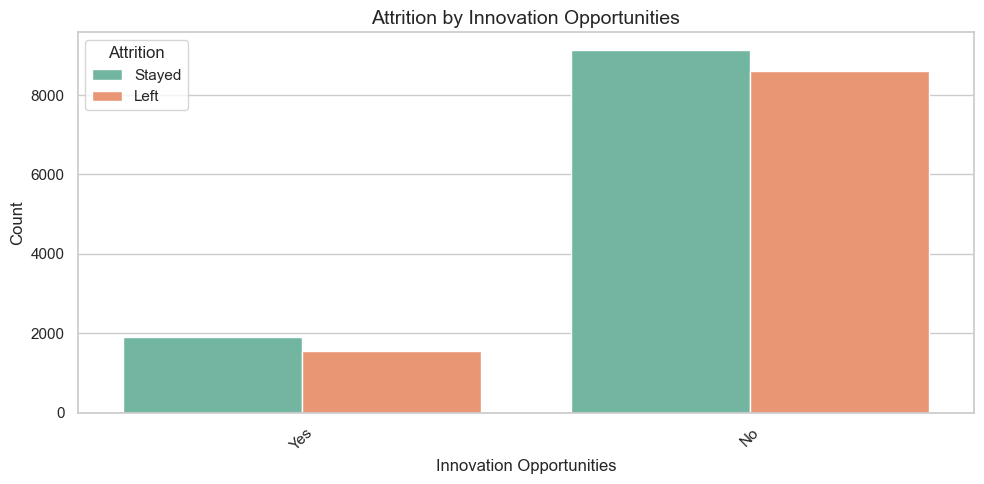

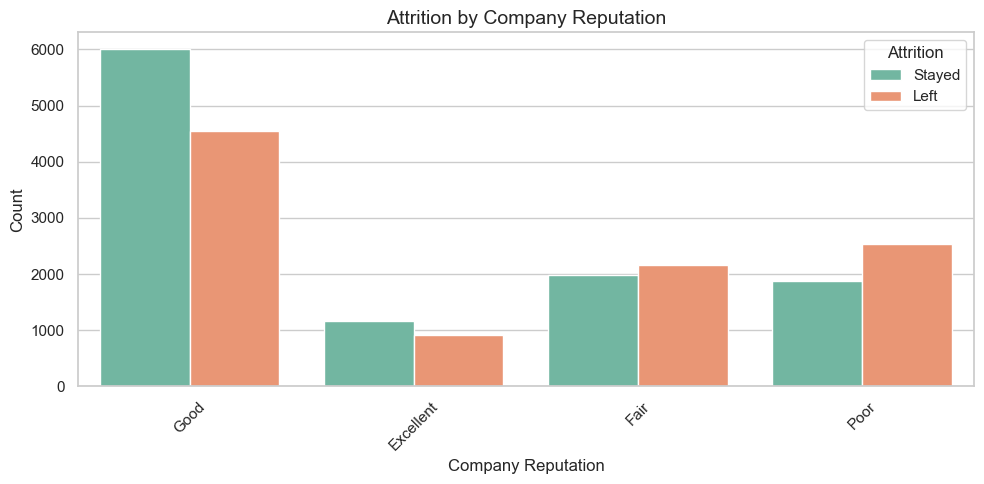

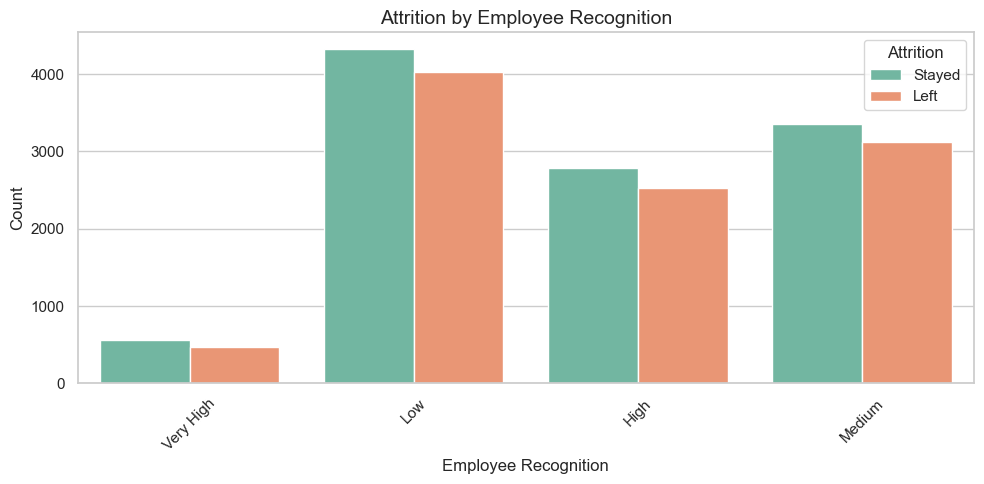

In [79]:
# Plot distribution for each categorical column with target variable
Validation_data = X_test.copy()
Validation_data['Attrition'] = y_test

Val_cat_cols_X_test = X_test.select_dtypes(include=['object', 'category']).columns

#set plot Style
sns.set(style='whitegrid')

#plot Distribution for each categorical column with respect to Attrition

for col in Val_cat_cols_X_test:
    plt.figure(figsize=(10,5))
    sns.countplot(data = Validation_data, x= col, hue = 'Attrition', palette='Set2')
    plt.title(f'Attrition by {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [83]:
# Check the categorical columns
cat_cols_emp = emp.select_dtypes(include=['object','category']).columns
cat_cols_emp = [col for col in cat_cols_emp if col != 'Attrition']

print("Categorical Columns requiring dummy variables:")
print(cat_cols_emp)

Categorical Columns requiring dummy variables:
['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [85]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train[cat_cols_emp], drop_first=True)

# Add the results to the master DataFrame
train_master_df = pd.concat([X_train.reset_index(drop=True).drop(columns=cat_cols_emp,errors='ignore'),X_train_dummies.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
train_master_df.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
0   39                25            5980                     1   
1   19                 3            8663                     2   
2   49                29            6195                     0   
3   30                 9            5753                     1   
4   26                15            5811                     2   

   Distance from Home  Number of Dependents  Gender_Male  Job Role_Finance  \
0                31.0                     1        False             False   
1                58.0                     4         True             False   
2                66.0                     1        False             False   
3                59.0                     3         True             False   
4                76.0                     2        False             False   

   Job Role_Healthcare  Job Role_Media  ...  Remote Work_Yes  \
0                False            True  ...            False   
1                False           False  ...            False   
2                False            True  ...            False   
3                False            True  ...            False   
4                False           False  ...            False   

   Leadership Opportunities_Yes  Innovation Opportunities_Yes  \
0                         False                         False   
1                         False                         False   
2                         False                         False   
3                         False                         False   
4                         False                         False   

   Company Reputation_Fair  Company Reputation_Good  Company Reputation_Poor  \
0                    False                    False                     True   
1                     True                    False                    False   
2                    False                     True                    False   
3                    False                    False                     True   
4                    False                     True                    False   

   Employee Recognition_Low  Employee Recognition_Medium  \
0                     False                         True   
1                      True                        False   
2                     False                         True   
3                      True                        False   
4                      True                        False   

   Employee Recognition_Very High  Attrition  
0                           False     Stayed  
1                           False     Stayed  
2                           False       Left  
3                           False       Left  
4                           False       Left  

[5 rows x 41 columns]

Now, drop the original categorical columns and check the DataFrame

In [87]:
# Drop the original categorical columns and check the DataFrame
X_train_dropped = X_train.drop(columns= cat_cols_emp, errors='ignore')

X_train_dropped = X_train_dropped.reset_index(drop=True)
X_train_dummies = X_train_dummies.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

train_master_df = pd.concat([X_train_dropped,X_train_dummies, y_train_reset], axis=1)

train_master_df.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
0   39                25            5980                     1   
1   19                 3            8663                     2   
2   49                29            6195                     0   
3   30                 9            5753                     1   
4   26                15            5811                     2   

   Distance from Home  Number of Dependents  Gender_Male  Job Role_Finance  \
0                31.0                     1        False             False   
1                58.0                     4         True             False   
2                66.0                     1        False             False   
3                59.0                     3         True             False   
4                76.0                     2        False             False   

   Job Role_Healthcare  Job Role_Media  ...  Remote Work_Yes  \
0                False            True  ...            False   
1                False           False  ...            False   
2                False            True  ...            False   
3                False            True  ...            False   
4                False           False  ...            False   

   Leadership Opportunities_Yes  Innovation Opportunities_Yes  \
0                         False                         False   
1                         False                         False   
2                         False                         False   
3                         False                         False   
4                         False                         False   

   Company Reputation_Fair  Company Reputation_Good  Company Reputation_Poor  \
0                    False                    False                     True   
1                     True                    False                    False   
2                    False                     True                    False   
3                    False                    False                     True   
4                    False                     True                    False   

   Employee Recognition_Low  Employee Recognition_Medium  \
0                     False                         True   
1                      True                        False   
2                     False                         True   
3                      True                        False   
4                      True                        False   

   Employee Recognition_Very High  Attrition  
0                           False     Stayed  
1                           False     Stayed  
2                           False       Left  
3                           False       Left  
4                           False       Left  

[5 rows x 41 columns]

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [89]:
# Create dummy variables using the 'get_dummies' for independent columns
X_test_dummies = pd.get_dummies(X_test[cat_cols_emp], drop_first=True)

# Add the results to the master DataFrame
test_master_df = pd.concat([X_test.reset_index(drop=True).drop(columns=cat_cols_emp,errors='ignore'),X_test_dummies.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
test_master_df.head()


Age  Years at Company  Monthly Income  Number of Promotions  \
0   22                 5            8751                     2   
1   43                19            8585                     2   
2   39                 2            5462                     1   
3   30                11            7936                     2   
4   49                37            5413                     1   

   Distance from Home  Number of Dependents  Gender_Male  Job Role_Finance  \
0                32.0                     1        False             False   
1                38.0                     4        False             False   
2                40.0                     1         True             False   
3                21.0                     0         True             False   
4                13.0                     0        False             False   

   Job Role_Healthcare  Job Role_Media  ...  Remote Work_Yes  \
0                 True           False  ...            False   
1                False           False  ...            False   
2                False            True  ...            False   
3                False           False  ...            False   
4                False            True  ...            False   

   Leadership Opportunities_Yes  Innovation Opportunities_Yes  \
0                         False                          True   
1                         False                         False   
2                         False                          True   
3                         False                         False   
4                         False                         False   

   Company Reputation_Fair  Company Reputation_Good  Company Reputation_Poor  \
0                    False                     True                    False   
1                    False                     True                    False   
2                    False                    False                    False   
3                     True                    False                    False   
4                    False                     True                    False   

   Employee Recognition_Low  Employee Recognition_Medium  \
0                     False                        False   
1                      True                        False   
2                      True                        False   
3                     False                        False   
4                     False                         True   

   Employee Recognition_Very High  Attrition  
0                            True     Stayed  
1                           False     Stayed  
2                           False     Stayed  
3                           False     Stayed  
4                           False       Left  

[5 rows x 41 columns]

Now, drop the original categorical columns and check the DataFrame

In [91]:
# Drop categorical columns and check the DataFrame
X_test_dropped = X_test.drop(columns= cat_cols_emp, errors='ignore')

X_test_dropped = X_test_dropped.reset_index(drop=True)
X_test_dummies = X_test_dummies.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

test_master_df = pd.concat([X_test_dropped,X_test_dummies, y_test_reset], axis=1)

test_master_df.head()

Age  Years at Company  Monthly Income  Number of Promotions  \
0   22                 5            8751                     2   
1   43                19            8585                     2   
2   39                 2            5462                     1   
3   30                11            7936                     2   
4   49                37            5413                     1   

   Distance from Home  Number of Dependents  Gender_Male  Job Role_Finance  \
0                32.0                     1        False             False   
1                38.0                     4        False             False   
2                40.0                     1         True             False   
3                21.0                     0         True             False   
4                13.0                     0        False             False   

   Job Role_Healthcare  Job Role_Media  ...  Remote Work_Yes  \
0                 True           False  ...            False   
1                False           False  ...            False   
2                False            True  ...            False   
3                False           False  ...            False   
4                False            True  ...            False   

   Leadership Opportunities_Yes  Innovation Opportunities_Yes  \
0                         False                          True   
1                         False                         False   
2                         False                          True   
3                         False                         False   
4                         False                         False   

   Company Reputation_Fair  Company Reputation_Good  Company Reputation_Poor  \
0                    False                     True                    False   
1                    False                     True                    False   
2                    False                    False                    False   
3                     True                    False                    False   
4                    False                     True                    False   

   Employee Recognition_Low  Employee Recognition_Medium  \
0                     False                        False   
1                      True                        False   
2                      True                        False   
3                     False                        False   
4                     False                         True   

   Employee Recognition_Very High  Attrition  
0                            True     Stayed  
1                           False     Stayed  
2                           False     Stayed  
3                           False     Stayed  
4                           False       Left  

[5 rows x 41 columns]

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [93]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [95]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train_dummies = pd.get_dummies(y_train_df['Attrition'], drop_first= True)

print(y_train_dummies.head())

       Stayed
1516     True
3352     True
59196   False
71453   False
68890   False


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [97]:
# Create dummy variables using the 'get_dummies' for dependent column
y_test_dummies = pd.get_dummies(y_test_df['Attrition'], drop_first= True)

print(y_train_dummies.head())

       Stayed
1516     True
3352     True
59196   False
71453   False
68890   False


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [99]:
# Drop redundant columns from both train and validation
redundant_cols = [
    'Gender_Male', 'Job Role_Finance', 'Work-Life Balance_Fair',
    'Job Satisfaction_Low', 'Performance Rating_Low', 'Overtime_Yes',
    'Education Level_High School', 'Marital Status_Single', 'Job Level_Mid',
    'Company Size_Small', 'Remote Work_Yes', 'Leadership Opportunities_Yes',
    'Innovation Opportunities_Yes', 'Company Reputation_Fair',
    'Employee Recognition_Low'
]

train_cols_drop = [col for col in redundant_cols if col in train_master_df.columns]
test_cols_drop = [col for col in redundant_cols if col in test_master_df.columns]

train_master_df.drop(columns=train_cols_drop,inplace= True)
print(train_master_df.columns)
test_master_df.drop(columns=test_cols_drop,inplace= True)
print(test_master_df.columns)

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Job Role_Healthcare',
       'Job Role_Media', 'Job Role_Technology', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Medium',
       'Job Satisfaction_Very High', 'Performance Rating_Below Average',
       'Performance Rating_High', 'Education Level_Bachelor's Degree',
       'Education Level_Master's Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Job Level_Senior', 'Company Size_Medium',
       'Company Reputation_Good', 'Company Reputation_Poor',
       'Employee Recognition_Medium', 'Employee Recognition_Very High',
       'Attrition'],
      dtype='object')
Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Job Role_Healthcare',
       'Job Role_Media', 'Job Role_Technology', 'Work-Life Balance_Good',
       'Work-Life Balance_P

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [102]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [104]:
scaler = StandardScaler()
# Scale the numeric features present in the training set
num_features_train = train_master_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
train_master_df[num_features_train] = scaler.fit_transform(train_master_df[num_features_train])
# Scale the numerical features present in the validation set

num_features_test = test_master_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
test_master_df[num_features_test] = scaler.transform(test_master_df[num_features_test])

print("Scaled Training Set (First 5 Rows):")
print(train_master_df.head())

# Print the first few rows of the scaled test set
print("\nScaled Test Set (First 5 Rows):")
print(test_master_df.head())

Scaled Training Set (First 5 Rows):
        Age  Years at Company  Monthly Income  Number of Promotions  \
0  0.040209          0.826635       -0.541329              0.169391   
1 -1.610906         -1.131550        0.525405              1.171706   
2  0.865767          1.182668       -0.455847             -0.832925   
3 -0.702793         -0.597500       -0.631582              0.169391   
4 -1.033016         -0.063449       -0.608522              1.171706   

   Distance from Home  Number of Dependents  Job Role_Healthcare  \
0           -0.666328             -0.417050                False   
1            0.279039              1.485045                False   
2            0.559147             -0.417050                False   
3            0.314052              0.851014                False   
4            0.909283              0.216982                False   

   Job Role_Media  Job Role_Technology  Work-Life Balance_Good  ...  \
0            True                False                   

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [108]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)


7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [110]:
# Import RFE and select 15 variables
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE

print("y_train shape:", y_train.shape)
print(y_train.head())
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
print("X_train_encoded shape:", X_train_encoded.shape)

imputer = SimpleImputer(strategy='mean')
X_train_imputed= imputer.fit_transform(X_train_encoded)
#Create Rfe object and select 15 features 
rfe= RFE(estimator = logreg, n_features_to_select=15)

rfe.fit(X_train_imputed, y_train)

selected_features = X_train_encoded.columns[rfe.support_]

y_train shape: (49444,)
1516     Stayed
3352     Stayed
59196      Left
71453      Left
68890      Left
Name: Attrition, dtype: object
X_train_encoded shape: (49444, 40)


In [111]:
# Display the features selected by RFE
print("Selected Features by RFE:")
for feature in selected_features:
    print("-", feature)


Selected Features by RFE:
- Gender_Male
- Work-Life Balance_Fair
- Work-Life Balance_Poor
- Job Satisfaction_Low
- Job Satisfaction_Very High
- Performance Rating_Below Average
- Performance Rating_Low
- Overtime_Yes
- Education Level_PhD
- Marital Status_Single
- Job Level_Mid
- Job Level_Senior
- Remote Work_Yes
- Company Reputation_Fair
- Company Reputation_Poor


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [113]:
# Put columns selected by RFE into variable 'col'
col = selected_features.tolist()
print("Selected Features stored in 'col':",col)

Selected Features stored in 'col': ['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Job Satisfaction_Low', 'Job Satisfaction_Very High', 'Performance Rating_Below Average', 'Performance Rating_Low', 'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair', 'Company Reputation_Poor']


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [116]:
# Select only the columns selected by RFE
X_train_sm = X_train_encoded[col]
X_train_sm.head()

Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
1516         False                   False                   False   
3352          True                   False                   False   
59196        False                   False                   False   
71453         True                   False                   False   
68890        False                    True                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
1516                  False                       False   
3352                  False                       False   
59196                 False                       False   
71453                 False                       False   
68890                 False                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
1516                              False                   False         False   
3352                              False                   False         False   
59196                             False                   False         False   
71453                             False                   False          True   
68890                              True                   False         False   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
1516                 False                  False          False   
3352                 False                  False          False   
59196                False                  False           True   
71453                False                  False          False   
68890                False                  False          False   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
1516              False            False                    False   
3352               True            False                     True   
59196             False            False                    False   
71453             False            False                    False   
68890              True            False                    False   

       Company Reputation_Poor  
1516                      True  
3352                     False  
59196                    False  
71453                     True  
68890                    False

In [117]:
# View the training data
X_train_sm.head()

Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
1516         False                   False                   False   
3352          True                   False                   False   
59196        False                   False                   False   
71453         True                   False                   False   
68890        False                    True                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
1516                  False                       False   
3352                  False                       False   
59196                 False                       False   
71453                 False                       False   
68890                 False                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
1516                              False                   False         False   
3352                              False                   False         False   
59196                             False                   False         False   
71453                             False                   False          True   
68890                              True                   False         False   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
1516                 False                  False          False   
3352                 False                  False          False   
59196                False                  False           True   
71453                False                  False          False   
68890                False                  False          False   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
1516              False            False                    False   
3352               True            False                     True   
59196             False            False                    False   
71453             False            False                    False   
68890              True            False                    False   

       Company Reputation_Poor  
1516                      True  
3352                     False  
59196                    False  
71453                     True  
68890                    False

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [119]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_sm)
X_train_sm.head()


const  Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
1516     1.0        False                   False                   False   
3352     1.0         True                   False                   False   
59196    1.0        False                   False                   False   
71453    1.0         True                   False                   False   
68890    1.0        False                    True                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
1516                  False                       False   
3352                  False                       False   
59196                 False                       False   
71453                 False                       False   
68890                 False                       False   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
1516                              False                   False         False   
3352                              False                   False         False   
59196                             False                   False         False   
71453                             False                   False          True   
68890                              True                   False         False   

       Education Level_PhD  Marital Status_Single  Job Level_Mid  \
1516                 False                  False          False   
3352                 False                  False          False   
59196                False                  False           True   
71453                False                  False          False   
68890                False                  False          False   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
1516              False            False                    False   
3352               True            False                     True   
59196             False            False                    False   
71453             False            False                    False   
68890              True            False                    False   

       Company Reputation_Poor  
1516                      True  
3352                     False  
59196                    False  
71453                     True  
68890                    False

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [121]:
y_train.head()

1516     Stayed
3352     Stayed
59196      Left
71453      Left
68890      Left
Name: Attrition, dtype: object

In [122]:
y_train.isnull().sum()

0

In [123]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
y_train = y_train.map({'Left': 1, 'Stayed': 0})
y_train = y_train.astype(int)


X_train_sm = X_train_sm.astype(int)
log_reg_model = sm.Logit(y_train, X_train_sm)
result = log_reg_model.fit()
# Show the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.507072
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                49444
Model:                          Logit   Df Residuals:                    49428
Method:                           MLE   Df Model:                           15
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:                  0.2675
Time:                        17:08:45   Log-Likelihood:                -25072.
converged:                       True   LL-Null:                       -34227.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.2356      0.028     -8.33

In [124]:
y_train.head()

1516     0
3352     0
59196    1
71453    1
68890    1
Name: Attrition, dtype: int64

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [127]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
# Make a VIF DataFrame for all the variables present
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_sm.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_sm.values, i)
                   for i in range(X_train_sm.shape[1])]

# Display VIF DataFrame
vif_data.sort_values(by='VIF', ascending=False)


Feature       VIF
0                              const  7.182323
12                  Job Level_Senior  1.202138
11                     Job Level_Mid  1.202082
3             Work-Life Balance_Poor  1.075918
2             Work-Life Balance_Fair  1.075798
14           Company Reputation_Fair  1.066846
15           Company Reputation_Poor  1.066785
4               Job Satisfaction_Low  1.029756
5         Job Satisfaction_Very High  1.029698
7             Performance Rating_Low  1.009821
6   Performance Rating_Below Average  1.009424
8                       Overtime_Yes  1.000525
1                        Gender_Male  1.000454
13                   Remote Work_Yes  1.000319
10             Marital Status_Single  1.000265
9                Education Level_PhD  1.000210

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [131]:
# Predict probabilities on the training set
y_train_pred_prob = result.predict(X_train_sm)

# Display first few predictions
y_train_pred_prob.head()


1516     0.622530
3352     0.056655
59196    0.232063
71453    0.563437
68890    0.197320
dtype: float64

7.2.6 Format the prediction output [1 Mark]

In [133]:
# Reshape it into an array
y_train_pred_prob_array = y_train_pred_prob.to_numpy()

print(y_train_pred_prob_array[:5])

[0.62253021 0.05665491 0.23206348 0.5634373  0.19732035]


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [135]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
train_results = pd.DataFrame({
    'Actual': y_train,
    'Predicted_Prob': y_train_pred_prob_array
})

print(train_results.head())

       Actual  Predicted_Prob
1516        0        0.622530
3352        0        0.056655
59196       1        0.232063
71453       1        0.563437
68890       1        0.197320


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [137]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
train_results['Predicted'] = (train_results['Predicted_Prob'] > 0.5).astype(int)

print(train_results.head())

       Actual  Predicted_Prob  Predicted
1516        0        0.622530          1
3352        0        0.056655          0
59196       1        0.232063          0
71453       1        0.563437          1
68890       1        0.197320          0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [140]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(train_results['Actual'], train_results['Predicted'])
print("Training Accuracy:", accuracy)


Training Accuracy: 0.738734730199822


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [142]:
# Create confusion matrix
conf_matrix = metrics.confusion_matrix(train_results['Actual'], train_results['Predicted'])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[19422  6359]
 [ 6559 17104]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [144]:
# Create variables for true positive, true negative, false positive and false negative

# Unpack the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Print the values
print(f"True Positive (TP): {tp}")
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")


True Positive (TP): 17104
True Negative (TN): 19422
False Positive (FP): 6359
False Negative (FN): 6559


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [146]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)

# Print the values
print(f"Sensitivity: {sensitivity:.2f}")


Sensitivity: 0.72


In [147]:
# Calculate specificity
specificity = tn / (tn + fp)

# Print the result
print(f"Specificity: {specificity:.2f}")

Specificity: 0.75


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [149]:
# Calculate precision
precision = tp / (tp + fp)

# Print the result
print(f"Precision: {precision:.2f}")


Precision: 0.73


In [150]:
# Calculate recall
recall = tp / (tp + fn)

# Print the result
print(f"Recall: {recall:.2f}")


Recall: 0.72


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [153]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(actual, predicted_prob):
    fpr, tpr, thresholds = roc_curve(actual, predicted_prob)
    auc = roc_auc_score(actual, predicted_prob)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return auc


In [154]:
# Call the ROC function
auc_score = plot_roc(train_results['Actual'], train_results['Predicted_Prob'])
print(f"AUC SCORE: {auc_score:.2f}")

AUC SCORE: 0.83


**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [157]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance

# Define the cutoffs to evaluate
cutoffs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for cutoff in cutoffs:
    col_name = f'Predicted_{int(cutoff*100)}'
    train_results[col_name] = train_results['Predicted_Prob'].apply(lambda x: 1 if x > cutoff else 0)

# Display a sample
train_results.head()


Actual  Predicted_Prob  Predicted  Predicted_10  Predicted_20  \
1516        0        0.622530          1             1             1   
3352        0        0.056655          0             0             0   
59196       1        0.232063          0             1             1   
71453       1        0.563437          1             1             1   
68890       1        0.197320          0             1             0   

       Predicted_30  Predicted_40  Predicted_50  Predicted_60  Predicted_70  \
1516              1             1             1             1             0   
3352              0             0             0             0             0   
59196             0             0             0             0             0   
71453             1             1             1             0             0   
68890             0             0             0             0             0   

       Predicted_80  Predicted_90  
1516              0             0  
3352              0             0  
59196             0             0  
71453             0             0  
68890             0             0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [159]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs

cutoff_vals=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracy_vals = []
sensitivity_vals = []
specificity_vals = []

# Loop through each cutoff
for cutoff in cutoffs:
    pred_col = f'Predicted_{int(cutoff*100)}'
    cm = metrics.confusion_matrix(train_results['Actual'], train_results[pred_col])
    
    TN, FP, FN, TP = cm.ravel()
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    
    # Append metrics
    accuracy_vals.append(accuracy)
    sensitivity_vals.append(sensitivity)
    specificity_vals.append(specificity)

# Create a DataFrame with all metric values
metrics_df = pd.DataFrame({
    'Cutoff': cutoff_vals,
    'Accuracy': accuracy_vals,
    'Sensitivity': sensitivity_vals,
    'Specificity': specificity_vals
})


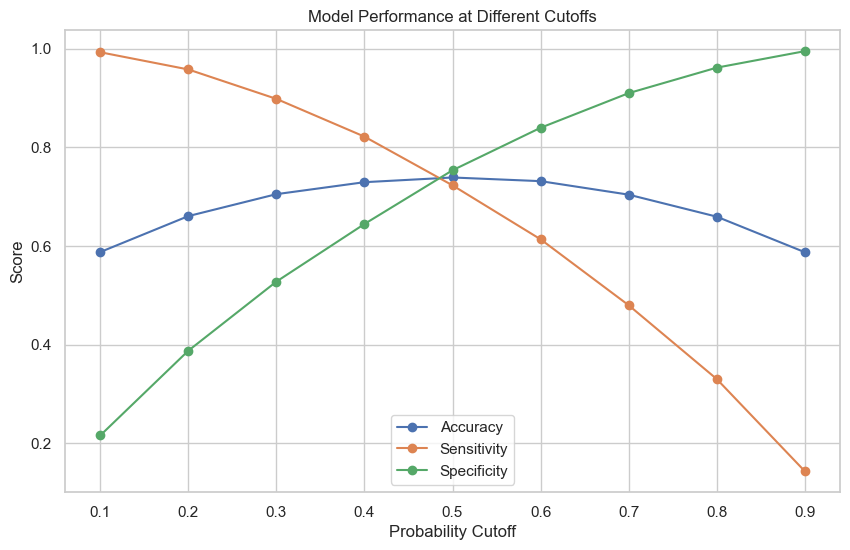

Cutoff  Accuracy  Sensitivity  Specificity
0     0.1  0.587614     0.992520     0.215973
1     0.2  0.660464     0.957655     0.387689
2     0.3  0.704939     0.898026     0.527714
3     0.4  0.729209     0.821536     0.644467
4     0.5  0.738735     0.722816     0.753345
5     0.6  0.731312     0.613489     0.839455
6     0.7  0.703968     0.479905     0.909623
7     0.8  0.659352     0.330389     0.961289
8     0.9  0.587392     0.143642     0.994686

In [160]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Cutoff'], metrics_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(metrics_df['Cutoff'], metrics_df['Sensitivity'], label='Sensitivity', marker='o')
plt.plot(metrics_df['Cutoff'], metrics_df['Specificity'], label='Specificity', marker='o')

plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Model Performance at Different Cutoffs')
plt.grid(True)
plt.legend()
plt.show()

# Display the metrics DataFrame
metrics_df


7.3.4 Create a column for final prediction based on the optimal cutoff [2 MARKS]

In [162]:
# Create a column for final prediction based on the optimal cutoff
# Set optimal cutoff 
optimal_cutoff = 0.5

# Create final prediction column based on optimal cutoff
train_results['Final_Prediction'] = (train_results['Predicted_Prob'] > optimal_cutoff).astype(int)

# Display first few rows to confirm
print(train_results[['Actual', 'Predicted_Prob', 'Final_Prediction']].head())


       Actual  Predicted_Prob  Final_Prediction
1516        0        0.622530                 1
3352        0        0.056655                 0
59196       1        0.232063                 0
71453       1        0.563437                 1
68890       1        0.197320                 0


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [164]:
# Calculate the accuracy
accuracy = metrics.accuracy_score(train_results['Actual'], train_results['Final_Prediction'])

print(f"Model Accuracy at cutoff {optimal_cutoff}: {accuracy:.4f}")


Model Accuracy at cutoff 0.5: 0.7387


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [166]:
# Create the confusion matrix once again
conf_matrix = metrics.confusion_matrix(train_results['Actual'], train_results['Final_Prediction'])
# Display the confusion matrix
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[19422  6359]
 [ 6559 17104]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [168]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = metrics.confusion_matrix(train_results['Actual'], train_results['Final_Prediction']).ravel()

# Display the values
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 17104
True Negatives (TN): 19422
False Positives (FP): 6359
False Negatives (FN): 6559


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [170]:
# Calculate Sensitivity
sensitivity = tp / (tp + fn)
print("Sensitivity:", round(sensitivity, 4))


Sensitivity: 0.7228


In [171]:
# Calculate Specificity
specificity = tn / (tn + fp)
print("Specificity:", round(specificity, 4))


Specificity: 0.7533


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [173]:
# Calculate Precision
precision = tp / (tp + fp)
print("Precision:", round(precision, 4))


Precision: 0.729


In [174]:
# Calculate Recall
recall = tp / (tp + fn)
print("Recall:", round(recall, 4))


Recall: 0.7228


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [176]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [177]:
# Check actual and predicted values from initial model
y_actual = train_results['Actual']
y_pred_prob = train_results['Predicted_Prob']

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

In [179]:
# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_actual,y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [183]:
# Select the relevant features for validation set
final_features = col

# Encode validation set
X_val_encoded = pd.get_dummies(X_test, drop_first=True)

# Add missing columns with 0s
for feature in final_features:
    if feature not in X_val_encoded.columns:
        X_val_encoded[feature] = 0

# Selecting relevant features
X_val_final = X_val_encoded[final_features]

print(X_val_final.head())

print(X_val_encoded.columns)

# Check the first few rows of the encoded validation set
print(X_val_encoded.head())

       Gender_Male  Work-Life Balance_Fair  Work-Life Balance_Poor  \
38726        False                   False                   False   
24574        False                   False                   False   
21775         True                   False                    True   
42700         True                   False                   False   
60433        False                   False                   False   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
38726                 False                        True   
24574                 False                       False   
21775                 False                       False   
42700                 False                       False   
60433                 False                        True   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
38726                             False                   False         False   
24574                             False                   Fals

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [185]:
# Add constant to X_validation
X_val_sm = sm.add_constant(X_val_final)


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [187]:
X_val_sm = X_val_sm.reindex(columns=X_train_sm.columns, fill_value=0).astype(float)

In [188]:
X_val_sm = X_val_sm.reindex(columns=X_train_sm.columns, fill_value=0)
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = result.predict(X_val_sm)
y_validation_pred = (y_validation_pred>0.5).astype(int)

# View predictions
y_validation_pred.head()

38726    0
24574    0
21775    1
42700    0
60433    1
dtype: int64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [190]:
print(y_test.isna().sum())

y_test_binary = y_test.map({'Stayed': 1, 'Left': 0})

print(y_test_binary.head())

# Convert 'y_validation_pred' to a DataFrame 'Predicted_Prob'
Predicted_Prob = pd.DataFrame(y_validation_pred, columns=["Predicted"])

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_test_binary.values, columns=["Actual"])
print(actual.head())  # Check first few rows of the actual values

# Remove index from both DataFrames 'actual' and 'Predicted_Prob' to append them side by side
actual.reset_index(drop=True, inplace=True)
Predicted_Prob.reset_index(drop=True, inplace=True)

validation_train_results = pd.concat([actual, Predicted_Prob], axis=1)
print(validation_train_results.head())


0
38726    1
24574    1
21775    1
42700    1
60433    0
Name: Attrition, dtype: int64
   Actual
0       1
1       1
2       1
3       1
4       0
   Actual  Predicted
0       1          0
1       1          0
2       1          1
3       1          0
4       0          1


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [192]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
validation_train_results['final_prediction'] = (validation_train_results['Predicted']>0.5).astype(int)
                                             
# Check the DataFrame
print(validation_train_results.head())

   Actual  Predicted  final_prediction
0       1          0                 0
1       1          0                 0
2       1          1                 1
3       1          0                 0
4       0          1                 1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [194]:
# Calculate the overall accuracy
from sklearn.metrics import accuracy_score


# Map actual labels to 0/1: 'Left' -> 1, 'Stayed' -> 0
train_results["Actual_Attrition_Binary"] = train_results["Actual"].map({False: 0, True: 1})
print(train_results["Actual"].isna().sum())
# Calculate accuracy
accuracy = accuracy_score(train_results["Actual"], train_results["Final_Prediction"])

# Print result
print(f"Model Accuracy: {accuracy:.4f}")


0
Model Accuracy: 0.7387


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [196]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_results["Actual"], train_results["Final_Prediction"])


In [197]:
TN, FP, FN, TP = cm.ravel()

print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

True Positive (TP): 17104
True Negative (TN): 19422
False Positive (FP): 6359
False Negative (FN): 6559


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [199]:
# Calculate sensitivity
# Step 1: Calculate sensitivity
sensitivity = TP / (TP + FN)

# Step 2: Display the result
print(f"Sensitivity (Recall): {sensitivity:.4f}")


Sensitivity (Recall): 0.7228


In [200]:
# Calculate specificity
# Step 1: Calculate specificity
specificity = TN / (TN + FP)

# Step 2: Display the result
print(f"Specificity (True Negative Rate): {specificity:.4f}")


Specificity (True Negative Rate): 0.7533


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [202]:
# Calculate precision
# Calculate precision
precision = TP / (TP + FP)

# Display the result
print(f"Precision: {precision:.4f}")


Precision: 0.7290


In [203]:
# Calculate recall
recall = TP / (TP + FN)

# Display the result
print(f"Recall (Sensitivity): {recall:.4f}")

Recall (Sensitivity): 0.7228


## Conclusion



The logistic regression model has 73% accuracy, it can successfully identify a considerable number of employees that may leave, about 3 accurate predictions out of 4.
- The precision also lies close at 72.9%
- It's sensitivity is also around the same, 72.28%
- With 75.33% specifity, it can correctly identify non-attrition cases.